In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Datasets/hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
df.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [4]:
df.loc[0, 'experience'] = 'zero'
df.loc[1, 'experience'] = 'one'
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,one,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [5]:
!pip install word2number
from word2number import w2n

Defaulting to user installation because normal site-packages is not writeable
  Using cached word2number-1.1.zip (9.7 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5680 sha256=8dcde94e469b37af6d87627854727cf7301e6adbc444225424197faf589a1f77
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\aa\2b\71\ede4a3c3520a8374778c16c345e0e78e25d1ffe38f4c5c1e8a
Successfully built word2number


In [6]:
df['experience'] = df['experience'].apply(w2n.word_to_num)
df['experience']

0     0
1     1
2     5
3     2
4     7
5     3
6    10
7    11
Name: experience, dtype: int64

In [7]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median())
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,1,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [8]:
import math
df['test_score(out of 10)'] = df['test_score(out of 10)'].apply(math.floor)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8,9,50000
1,1,8,6,45000
2,5,6,7,60000
3,2,10,10,65000
4,7,9,6,70000
5,3,7,10,62000
6,10,8,7,72000
7,11,7,8,80000


In [9]:
df.rename(columns = {'test_score(out of 10)': 'test_score', 'interview_score(out of 10)': 'interview_score', 'salary($)': 'salary'}, inplace = 1)
df

,experience,test_score,interview_score,salary
0,0,8,9,50000
1,1,8,6,45000
2,5,6,7,60000
3,2,10,10,65000
4,7,9,6,70000
5,3,7,10,62000
6,10,8,7,72000
7,11,7,8,80000


In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df[['experience', 'test_score', 'interview_score']], df.salary)


LinearRegression()

In [11]:
model.coef_

array([2952.76492755, 1849.11614228, 2603.77439417])

In [12]:
model.intercept_

np.float64(13538.758003737632)

In [13]:
model.predict([[2,9,6]])

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([51708.9795043])

In [14]:
model.predict([[12,10,10]])

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93500.8424987])

   experience  test_score  interview_score  salary  predicted_salary
0           0           8                9   50000      51765.656689
1           1           8                6   45000      46907.098434
2           5           6                7   60000      57623.700254
3           2          10               10   65000      63973.193223
4           7           9                6   70000      66472.804142
5           3           7               10   62000      61378.609724
6          10           8                7   72000      76085.757177
7          11           7                8   80000      79793.180356


<Axes: xlabel='experience', ylabel='salary'>

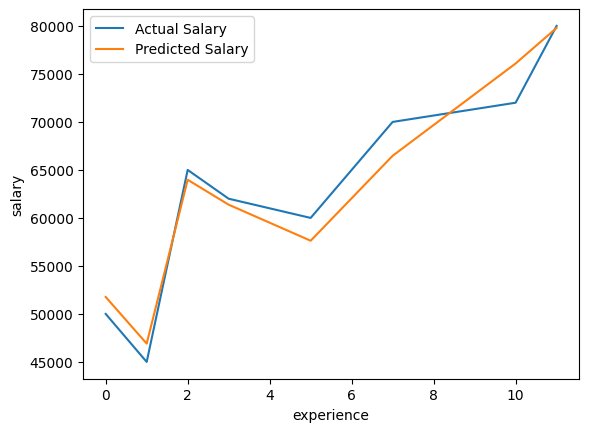

In [18]:
import seaborn as sns
df['predicted_salary'] = model.predict(df[['experience', 'test_score', 'interview_score']])
print(df)
sns.lineplot(x = df.experience, y = df.salary, label = 'Actual Salary')
sns.lineplot(x = df.experience, y = df.predicted_salary, label = 'Predicted Salary')